In [1]:
import sympy
from sympy.physics.vector import dynamicsymbols
import sympy_utils
from sympy_utils import short_latex, ShortLatexPrinter, matsym

sympy.init_session(latex_printer=short_latex)

IPython console for SymPy 1.3 (Python 3.7.2-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.3/



# Static and dynamic state feedback 

based on *Metody Matematyczne Automatyki i Robotyki, K. Tchoń, R. Muszyński* (p. 127)

In [2]:
d = Symbol('d')
q = x, y, theta = Matrix(dynamicsymbols('x y theta'))
u = u1, u2 = Matrix(dynamicsymbols('u1 u2'))

# kinematics
G = Matrix([
    [cos(theta), 0],
    [sin(theta), 0],
    [0,          1],
])
dq = G * u
dq

⎡u₁(t)⋅cos(θ(t))⎤
⎢               ⎥
⎢u₁(t)⋅sin(θ(t))⎥
⎢               ⎥
⎣     u₂(t)     ⎦

---

$ \dot h = D(q)u = v $

> $ D(q) $ is just a name of a matrix, not derivative symbol. Usually I call this $ \dfrac{\delta h(q)}{\delta q} G(q) $.

In [3]:
# output function
h = Matrix([
    x + d * cos(theta),
    y + d * sin(theta),
])

# let's differentiate and substitute derivatives of 'q' with 'u'
display(h.diff(t))

dh = h.diff(t).subs({_q.diff(): _dq for (_q, _dq) in zip(q, dq)})
assert dh == h.jacobian(q) * G * u, 'Should be the same'

Eq(matsym('\dot{h}', h), dh)

⎡              d          d       ⎤
⎢- d⋅sin(θ(t))⋅──(θ(t)) + ──(x(t))⎥
⎢              dt         dt      ⎥
⎢                                 ⎥
⎢             d          d        ⎥
⎢ d⋅cos(θ(t))⋅──(θ(t)) + ──(y(t)) ⎥
⎣             dt         dt       ⎦

          ⎡-d⋅u₂(t)⋅sin(θ(t)) + u₁(t)⋅cos(θ(t))⎤
\dot{h} = ⎢                                    ⎥
          ⎣d⋅u₂(t)⋅cos(θ(t)) + u₁(t)⋅sin(θ(t)) ⎦

In [6]:
# extracting matrix and vector from a vector
D = dh.jacobian(u)
D * matsym('u', u)

⎡cos(θ(t))  -d⋅sin(θ(t))⎤  
⎢                       ⎥⋅u
⎣sin(θ(t))  d⋅cos(θ(t)) ⎦  

In [7]:
# but this was the same as
assert h.jacobian(q) * G == D, 'Should be the same'
h.jacobian(q) * G

⎡cos(θ(t))  -d⋅sin(θ(t))⎤
⎢                       ⎥
⎣sin(θ(t))  d⋅cos(θ(t)) ⎦

## New coordinates $ \xi  $

In [8]:
xi = Matrix([*h, theta])
xi

⎡d⋅cos(θ(t)) + x(t)⎤
⎢                  ⎥
⎢d⋅sin(θ(t)) + y(t)⎥
⎢                  ⎥
⎣       θ(t)       ⎦

In [9]:
xi.diff(t) \
    .subs({_q.diff(): _dq for (_q, _dq) in zip(q, dq)})

⎡-d⋅u₂(t)⋅sin(θ(t)) + u₁(t)⋅cos(θ(t))⎤
⎢                                    ⎥
⎢d⋅u₂(t)⋅cos(θ(t)) + u₁(t)⋅sin(θ(t)) ⎥
⎢                                    ⎥
⎣               u₂(t)                ⎦

# When $ d = 0 $

In [10]:
# output function
h = Matrix([
    x,
    y,
])

In [11]:
h

In [12]:
D = h.jacobian(q) * G
dh = D * u
display( Eq(matsym('\dot{h}', h), D * matsym('u', u)) )
Eq(matsym('\dot{h}', h), dh)

          ⎡cos(θ(t))  0⎤  
\dot{h} = ⎢            ⎥⋅u
          ⎣sin(θ(t))  0⎦  

          ⎡u₁(t)⋅cos(θ(t))⎤
\dot{h} = ⎢               ⎥
          ⎣u₁(t)⋅sin(θ(t))⎦

In [13]:
ddh_ = dh.diff(t)
ddh = ddh_.subs({_q.diff(): _dq for (_q, _dq) in zip(q, dq)})
Eq(ddh_, ddh)

⎡                  d                    d        ⎤   ⎡                        
⎢- u₁(t)⋅sin(θ(t))⋅──(θ(t)) + cos(θ(t))⋅──(u₁(t))⎥   ⎢-u₁(t)⋅u₂(t)⋅sin(θ(t)) +
⎢                  dt                   dt       ⎥   ⎢                        
⎢                                                ⎥ = ⎢                        
⎢                 d                    d         ⎥   ⎢                        
⎢ u₁(t)⋅cos(θ(t))⋅──(θ(t)) + sin(θ(t))⋅──(u₁(t)) ⎥   ⎢u₁(t)⋅u₂(t)⋅cos(θ(t)) + 
⎣                 dt                   dt        ⎦   ⎣                        

           d        ⎤
 cos(θ(t))⋅──(u₁(t))⎥
           dt       ⎥
                    ⎥
          d         ⎥
sin(θ(t))⋅──(u₁(t)) ⎥
          dt        ⎦

Now, because $\dot u_1$ exist in the equation, we assume that it is another state variable and we define $w$.

If $\dot u_2$ existed too, we could just define $ w = \dot u $.

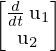

In [14]:
w = Matrix([u1.diff(), u2])
w

In [15]:
# again, to find this matrix we can do it like this
D_qu1 = ddh.jacobian(w)
D_qu1

⎡cos(θ(t))  -u₁(t)⋅sin(θ(t))⎤
⎢                           ⎥
⎣sin(θ(t))  u₁(t)⋅cos(θ(t)) ⎦